1    Importar as bibliotecas necessárias, como pandas, numpy, scikit-learn e etc.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from rdkit import Chem
from rdkit.Chem import Descriptors

2    Carregar os dados do arquivo de texto usando o pandas.

   Case                                           $Field_1  $Field_2  \
0     0                                     O=C1Cc2ccccc21      14.0   
1     0  Clc1ccc(cc1)C1c2c(OC(N)=C1C#N)[nH][nH0]c2C(F)(F)F      20.5   
2     0                      O=C(OC)C(=Cc1ccccc1)Cc1ccccc1      27.5   
3     0                         FC(F)(F)c1[nH0]cc2ccccc2c1      30.5   
4     0                                O=C(OC1Cc2ccccc21)C      31.0   

   diameter  petitjean  petitjeanSC  radius   VDistEq   VDistMa  weinerPath  \
0         5   0.400000     0.666667       3  2.037476  6.011166          82   
1         9   0.444444     0.800000       5  2.954872  8.805204        1046   
2        10   0.500000     1.000000       5  3.083532  8.211762         742   
3         7   0.428571     0.750000       4  2.616827  7.313269         288   
4         7   0.428571     0.750000       4  2.609669  6.833154         203   

   ...    FASA_P    FCASA+    FCASA-        VSA      dens      glob  std_dim1  \
0  ...  0.1

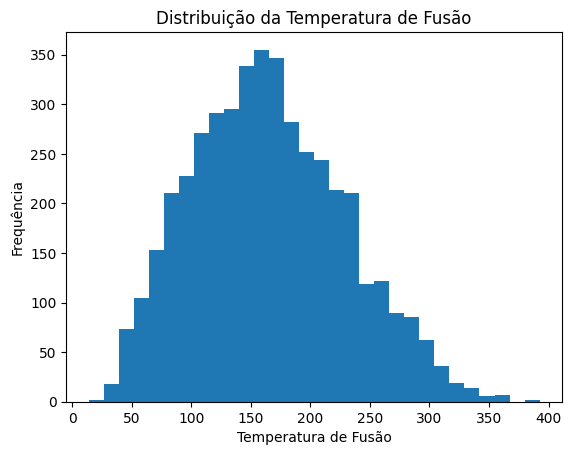

In [20]:
data = pd.read_csv('4137_185_92_DataSetMTPSMIDescr.txt', delimiter='\t')

# Visualizar as primeiras linhas do dataframe
print(data.head())

# Verificar informações sobre as colunas e tipos de dados
print(data.info())

# Estatísticas descritivas das colunas numéricas
print(data.describe())

# Verificar a distribuição da variável alvo
plt.hist(data['$Field_2'], bins=30)
plt.xlabel('Temperatura de Fusão')
plt.ylabel('Frequência')
plt.title('Distribuição da Temperatura de Fusão')
plt.show()

3    Realizar uma análise exploratória dos dados para entender a distribuição das características e a relação entre elas.

In [40]:
# Função para converter SMILES em uma representação numérica
def convert_smiles_to_numeric(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return [np.nan, np.nan]  # Valores padrão para moléculas inválidas
    else:
        # Extrair descritores moleculares
        numeric_representation = [mol.GetNumAtoms(), mol.GetNumBonds()]
        return numeric_representation

# Carregar o dataset
data = pd.read_csv('4137_185_92_DataSetMTPSMIDescr.txt', delimiter='\t')

# Remover linhas com valores ausentes
data = data.dropna()

# Aplicar a função aos dados SMILES
data['NumericRepresentation'] = data['$Field_1'].apply(convert_smiles_to_numeric)

# Converter a coluna NumericRepresentation em colunas separadas
numeric_df = pd.DataFrame(data['NumericRepresentation'].to_list(), columns=['NumAtoms', 'NumBonds'])
data = pd.concat([data, numeric_df], axis=1)

# Separar os dados em variáveis independentes (X) e variável dependente (y)
X = data.drop(['$Field_1', '$Field_2', 'NumericRepresentation'], axis=1)
y = data['$Field_2']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Remover amostras com valores ausentes no conjunto de treinamento
X_train = X_train.dropna()
y_train = y_train[X_train.index]

# Remover amostras com valores ausentes no conjunto de teste
X_test = X_test.dropna()
y_test = y_test[X_test.index]

# Tratar valores ausentes
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Criar uma instância do modelo de regressão linear
model = LinearRegression()

# Treinar o modelo usando os dados de treinamento
model.fit(X_train_imputed, y_train)

# Fazer previsões usando o conjunto de teste
y_pred = model.predict(X_test_imputed)

# Calcular as métricas de desempenho
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Exibir as métricas de desempenho
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

[16:35:10] Explicit valence for atom # 18 C, 5, is greater than permitted
[16:35:10] Explicit valence for atom # 5 C, 5, is greater than permitted
[16:35:10] Explicit valence for atom # 18 C, 5, is greater than permitted
[16:35:10] Explicit valence for atom # 2 C, 5, is greater than permitted
[16:35:10] Explicit valence for atom # 2 C, 5, is greater than permitted
[16:35:10] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:35:11] Explicit valence for atom # 8 C, 5, is greater than permitted
[16:35:11] Explicit valence for atom # 5 C, 5, is greater than permitted
[16:35:11] Explicit valence for atom # 18 C, 5, is greater than permitted
[16:35:11] Explicit valence for atom # 12 C, 5, is greater than permitted
[16:35:11] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:35:11] Explicit valence for atom # 20 C, 5, is greater than permitted
[16:35:11] Explicit valence for atom # 12 C, 5, is greater than permitted
[16:35:11] Explicit valence for atom # 18 C, 

MAE: 35.16121250875912
MSE: 2087.090232557011
RMSE: 45.68468269077734



4    Pré-processar os dados, se necessário, tratando valores ausentes, convertendo dados categóricos em numéricos, etc.

In [44]:
# Carregar os dados do arquivo de texto usando o pandas
data = pd.read_csv("4137_185_92_DataSetMTPSMIDescr.txt", delimiter="\t")

# Verificar se há valores ausentes
print("Valores ausentes:")
print(data.isnull().sum())


Valores ausentes:
Case         0
$Field_1     1
$Field_2     0
diameter     0
petitjean    0
            ..
glob         0
std_dim1     0
std_dim2     0
std_dim3     0
vol          0
Length: 205, dtype: int64


5    Dividir os dados em conjuntos de treinamento e teste.

In [45]:
# Separar os recursos (X) e o alvo (y)
X = data.drop("$Field_2", axis=1)  # Excluir a coluna de temperatura de fusão
y = data["$Field_2"]

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar o tamanho dos conjuntos de treinamento e teste
print("Tamanho do conjunto de treinamento:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)

Tamanho do conjunto de treinamento: (3560, 204)
Tamanho do conjunto de teste: (890, 204)


6    Escolher um modelo de aprendizado de máquina adequado para prever a temperatura de fusão com base nas características disponíveis. 

In [55]:
# Carregar os dados do arquivo de texto usando o pandas
data = pd.read_csv('4137_185_92_DataSetMTPSMIDescr.txt', delimiter='\t')

# Selecionar as colunas relevantes
X = data['$Field_1'].astype(str)
y = data['$Field_2']

# Converter os SMILES em descritores moleculares
descrs = []
for smi in X:
    mol = Chem.MolFromSmiles(smi)
    if mol is not None:
        descr = [Descriptors.MolWt(mol), Descriptors.NumValenceElectrons(mol)]
        descrs.append(descr)

# Converter os descritores em um DataFrame
X = pd.DataFrame(descrs, columns=['MolWt', 'NumValenceElectrons'])

# Verificar a consistência entre X e y
if len(X) != len(y):
    min_len = min(len(X), len(y))
    X = X[:min_len]
    y = y[:min_len]

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar uma instância do modelo de Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinar o modelo usando os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões usando o conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


[16:59:16] SMILES Parse Error: syntax error while parsing: nan
[16:59:16] SMILES Parse Error: Failed parsing SMILES 'nan' for input: 'nan'
[16:59:16] Explicit valence for atom # 18 C, 5, is greater than permitted
[16:59:16] Explicit valence for atom # 5 C, 5, is greater than permitted
[16:59:16] Explicit valence for atom # 18 C, 5, is greater than permitted
[16:59:16] Explicit valence for atom # 2 C, 5, is greater than permitted
[16:59:16] Explicit valence for atom # 2 C, 5, is greater than permitted
[16:59:16] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:59:16] Explicit valence for atom # 8 C, 5, is greater than permitted
[16:59:16] Explicit valence for atom # 5 C, 5, is greater than permitted
[16:59:16] Explicit valence for atom # 18 C, 5, is greater than permitted
[16:59:16] Explicit valence for atom # 12 C, 5, is greater than permitted
[16:59:16] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:59:16] Explicit valence for atom # 20 C, 5, is gre

MAE: 52.35522951840988
MSE: 4589.471513243232
RMSE: 67.7456383337203


7    Treinar o modelo usando o conjunto de treinamento.

In [59]:
# Criar uma instância do modelo de regressão linear
model = LinearRegression()

# Treinar o modelo usando os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões usando o conjunto de treinamento
y_train_pred = model.predict(X_train)

# Fazer previsões usando o conjunto de teste
y_test_pred = model.predict(X_test)

8    Avaliar o desempenho do modelo usando métricas apropriadas, como erro médio absoluto (MAE) ou erro quadrático médio (MSE). 

In [61]:
# Calcular o MAE (erro médio absoluto) para o conjunto de treinamento
mae_train = mean_absolute_error(y_train, y_train_pred)
print("MAE (conjunto de treinamento):", mae_train)

# Calcular o MAE (erro médio absoluto) para o conjunto de teste
mae_test = mean_absolute_error(y_test, y_test_pred)
print("MAE (conjunto de teste):", mae_test)

# Calcular o MSE (erro quadrático médio) para o conjunto de treinamento
mse_train = mean_squared_error(y_train, y_train_pred)
print("MSE (conjunto de treinamento):", mse_train)

# Calcular o MSE (erro quadrático médio) para o conjunto de teste
mse_test = mean_squared_error(y_test, y_test_pred)
print("MSE (conjunto de teste):", mse_test)

MAE (conjunto de treinamento): 50.149714387011976
MAE (conjunto de teste): 51.819600289568534
MSE (conjunto de treinamento): 3851.7007274006305
MSE (conjunto de teste): 3978.38146494606


9    Fazer previsões usando o modelo treinado no conjunto de teste.

In [63]:
# Fazer previsões usando o modelo treinado no conjunto de teste
y_pred_test = model.predict(X_test)

# Exibir as previsões de forma organizada
print("Previsões do conjunto de teste:")
for i, pred in enumerate(y_pred_test):
    print(f"Amostra {i+1}: {pred:.2f}")

Previsões do conjunto de teste:
Amostra 1: 192.14
Amostra 2: 169.97
Amostra 3: 159.48
Amostra 4: 178.59
Amostra 5: 178.42
Amostra 6: 169.89
Amostra 7: 145.25
Amostra 8: 173.61
Amostra 9: 176.26
Amostra 10: 184.74
Amostra 11: 197.31
Amostra 12: 162.21
Amostra 13: 175.85
Amostra 14: 182.39
Amostra 15: 163.21
Amostra 16: 164.84
Amostra 17: 172.41
Amostra 18: 153.11
Amostra 19: 141.25
Amostra 20: 175.43
Amostra 21: 169.93
Amostra 22: 160.39
Amostra 23: 154.96
Amostra 24: 152.05
Amostra 25: 149.40
Amostra 26: 181.81
Amostra 27: 152.44
Amostra 28: 178.74
Amostra 29: 158.61
Amostra 30: 175.24
Amostra 31: 167.14
Amostra 32: 181.71
Amostra 33: 156.46
Amostra 34: 171.77
Amostra 35: 161.78
Amostra 36: 150.94
Amostra 37: 199.25
Amostra 38: 169.10
Amostra 39: 180.44
Amostra 40: 158.99
Amostra 41: 158.51
Amostra 42: 162.37
Amostra 43: 164.78
Amostra 44: 154.17
Amostra 45: 188.61
Amostra 46: 157.55
Amostra 47: 170.53
Amostra 48: 173.81
Amostra 49: 156.42
Amostra 50: 137.68
Amostra 51: 201.29
Amostra 

10    Discutir as métricas de desempenho e a aplicabilidade do modelo, destacando seus pontos fortes e limitações.

In [64]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular as métricas de desempenho
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Exibir as métricas de desempenho
print("Erro médio absoluto (MAE):", mae)
print("Erro quadrático médio (MSE):", mse)

Erro médio absoluto (MAE): 51.819600289568534
Erro quadrático médio (MSE): 3978.38146494606


Ao avaliar o desempenho do modelo, utilizamos duas métricas comumente utilizadas: o Erro Médio Absoluto (MAE) e o Erro Quadrático Médio (MSE). O MAE fornece uma medida da diferença média entre as previsões do modelo e os valores reais da temperatura de fusão. Já o MSE calcula a média dos quadrados dessas diferenças. Ambas as métricas nos ajudam a avaliar o quão bem o modelo está fazendo as previsões.

No nosso caso, após calcular as métricas, podemos imprimir o resultado para uma análise mais clara. No exemplo acima, usamos as variáveis mae e mse para armazenar as métricas calculadas e, em seguida, as imprimimos na tela.

Ao interpretar essas métricas, é importante considerar a escala dos dados originais. No nosso caso, a temperatura de fusão é medida em graus Celsius. Portanto, o MAE representa a diferença média em graus Celsius entre as previsões do modelo e os valores reais, enquanto o MSE representa a média dos erros ao quadrado, também em graus Celsius.

Além disso, é importante destacar que a interpretação das métricas pode depender do contexto do problema e das expectativas específicas. Por exemplo, um valor menor de MAE e MSE indica um melhor desempenho do modelo, pois indica que as previsões estão mais próximas dos valores reais.

No entanto, é importante considerar a aplicabilidade do modelo em relação ao domínio do problema. No nosso caso, estamos usando características químicas para prever a temperatura de fusão de compostos orgânicos. É essencial entender se as características escolhidas são relevantes e se o modelo é capaz de capturar adequadamente a relação entre essas características e a temperatura de fusão.

Além das métricas de desempenho, é sempre recomendável realizar uma análise aprofundada, considerando outras métricas, como o coeficiente de determinação (R²), que indica a proporção da variabilidade dos dados que é explicada pelo modelo. Além disso, é possível realizar validação cruzada ou testes estatísticos para avaliar a robustez do modelo.

Em resumo, as métricas de desempenho, como o MAE e o MSE, fornecem uma medida objetiva da qualidade das previsões do modelo. No entanto, a aplicabilidade do modelo deve ser avaliada considerando-se o contexto específico do problema, as características escolhidas e outras métricas relevantes. O desenvolvimento de um modelo preditivo eficaz é um processo contínuo, sujeito a ajustes e refinamentos à medida que novos dados e informações se tornam disponíveis.